In [21]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [23]:
data = pd.read_csv('/home/vignesh/Downloads/cleaned_and_imputed_data.csv',sep=',')

In [25]:
data[0:10]
train, test = train_test_split(data, train_size=0.65)

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
remove_999 = data[data['pdays']!=999]

In [40]:
clf = IsolationForest(max_samples=100)
pred = clf.fit(remove_999[['age','pdays']]).predict(remove_999[['age','pdays']])

/home/vignesh/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [41]:
remove_999['pred'] = pred

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


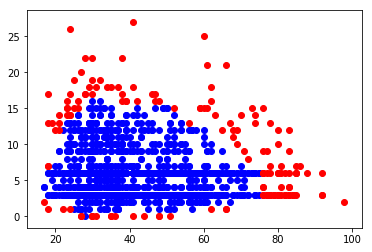

In [46]:
axes = plt.subplot()
axes.scatter(remove_999[remove_999['pred']==1]['age'],remove_999[remove_999['pred']==1]['pdays'],c='blue')
axes.scatter(remove_999[remove_999['pred']==-1]['age'],remove_999[remove_999['pred']==-1]['pdays'],c='red')

/home/vignesh/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


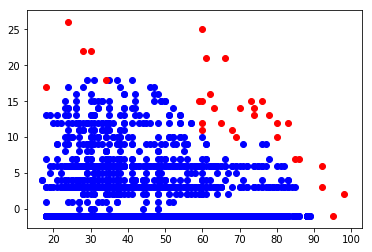

In [31]:
train.loc[train.pdays==999, 'pdays'] = -1
db = DBSCAN(eps=3, min_samples=10).fit(train[['age','pdays']])
train['pred'] = db.labels_
axes = plt.subplot()
axes.scatter(train[train['pred']!=-1]['age'],train[train['pred']!=-1]['pdays'],c='blue')
axes.scatter(train[train['pred']==-1]['age'],train[train['pred']==-1]['pdays'],c='red')
plt.show()